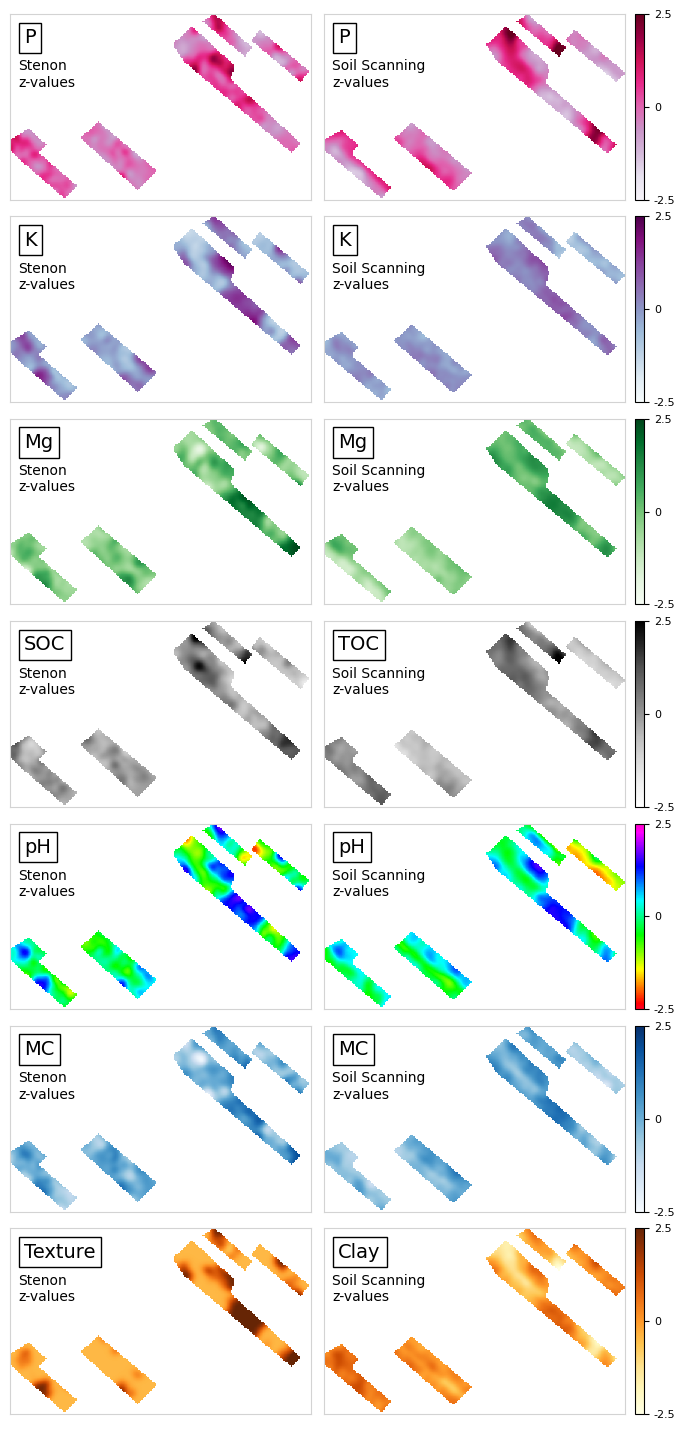

In [59]:
# compare Stenon to Soil scanning vertical
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import matplotlib.colorbar as mcb

import geopandas as gpd
import rasterio
from rasterio.crs import CRS
from rasterio.mask import mask
from skimage.transform import resize
import scipy.ndimage
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

part = 1

if part == 1:
    layers = ["z-P.tif", "z-K.tif", "z-Mg.tif", "z-SOC.tif", "z-pH.tif", "z-MC.tif", "z-Texture.tif"]
    labels_St = ["P",  "K",     "Mg",     "SOC",     "pH",     "MC",     "Texture"]
    labels_SS = ["P",  "K",     "Mg",     "TOC",     "pH",     "MC",     "Clay"]
    cmaps = ['PuRd','BuPu', 'Greens',   'Greys','gist_rainbow','Blues',  'YlOrBr']

if part == 2:
    layers = ["P.tif", "K.tif", "Mg.tif"]
    labels_St = ["P",  "K",     "Mg"]
    labels_SS = ["P",  "K",     "Mg"]
    cmaps = ['PuRd','BuPu', 'Greens']

if part == 3:
    layers = ["SOC.tif", "pH.tif", "MC.tif"]
    labels_St = ["SOC",     "pH",     "MC"]
    labels_SS = ["TOC",     "pH",     "MC"]
    cmaps = ['Greys','gist_rainbow','Blues']    

if part == 4:
    layers = ["z-Texture.tif"]
    labels_St = ["Texture"]
    labels_SS = ["Clay"]
    cmaps = ['YlOrBr']
    
# Plot the results in a single large plot 15*cm, 5*cm
fig, axs = plt.subplots(nrows=len(layers), ncols=2, figsize=(7, 2 * len(layers)))
# fig.suptitle('P', fontsize=16)


# Loop through layers
for i,layer in enumerate(layers):
    #print(layer)
    input_path_ss = f"soil_scanning_IDW_smoothed_masked_Z/masked/{layer}"
    input_path_stenon = f"stenon_IDW_smoothed_masked_Z/masked/{layer}"

    with rasterio.open(input_path_ss) as src_ss_idw:
        idw_ss_image = src_ss_idw.read(1)
        ss_transform = src_ss_idw.transform # save the information about scale, rotation, and translation.
        ss_crs = src_ss_idw.crs             # save CRS from the original IDW image
        #print(src_ss_idw.crs)
    
    with rasterio.open(input_path_stenon) as src_stenon_idw:
        idw_stenon_image = src_stenon_idw.read(1)
        transform = src_stenon_idw.transform
        crs = src_stenon_idw.crs  # Use CRS from the original IDW image

    # Max and Min values
    #vmin_ss = np.nanmin(idw_ss_image)
    #vmax_ss = np.nanmax(idw_ss_image)
    #vmin_stenon = np.nanmin(idw_stenon_image)
    #vmax_stenon = np.nanmax(idw_stenon_image)

    vmin_ss = -2.5
    vmax_ss = 2.5
    vmin_stenon = -2.5
    vmax_stenon = 2.5
    
    axs[i, 1].imshow(idw_ss_image, cmap=cmaps[i], vmin=vmin_ss, vmax=vmax_ss)
    axs[i, 0].imshow(idw_stenon_image, cmap=cmaps[i], vmin=vmin_stenon, vmax=vmax_stenon)

    # Title, text and ticks
    #if i==0:
        #axs[i, 0].set_title('Stenon (normalized)')
        #axs[i, 1].set_title('Soil Scanning (normalized)')

    
    #axs[i, 0].set_ylabel(labels_SS[i], fontsize=14)
    #axs[i, 1].set_ylabel(labels_St[i], fontsize=14)

    #axs[i, 1].text(14 , 44, labels_SS[i], fontsize=14, bbox={'facecolor':'white'})
    #axs[i, 1].text(10 , 25, "Soil Scanning\nz-values", fontsize=10)
    axs[i, 1].text(9 , 19, labels_SS[i], fontsize=14, bbox={'facecolor':'white'})
    axs[i, 1].text(5 , 48, "Soil Scanning\nz-values", fontsize=10)
    axs[i, 0].text(9 , 19, labels_St[i], fontsize=14, bbox={'facecolor':'white'})
    axs[i, 0].text(5 , 48, "Stenon\nz-values", fontsize=10)
    
    axs[i, 0].set_xticks([])
    axs[i, 0].set_yticks([])
    axs[i, 1].set_xticks([])
    axs[i, 1].set_yticks([])

    #axs[i,0].spines["top"].set_visible(False)
    #axs[i,0].spines["left"].set_visible(False)
    #axs[i,0].spines["right"].set_visible(False)
    #axs[i,0].spines["bottom"].set_visible(False)

    #axs[i,1].spines["top"].set_visible(False)
    #axs[i,1].spines["left"].set_visible(False)
    #axs[i,1].spines["right"].set_visible(False)
    #axs[i,1].spines["bottom"].set_visible(False)

    axs[i,0].spines["top"].set_color('lightgray')
    axs[i,0].spines["left"].set_color('lightgray')
    axs[i,0].spines["right"].set_color('lightgray')
    axs[i,0].spines["bottom"].set_color('lightgray')
    
    axs[i,1].spines["top"].set_color('lightgray')
    axs[i,1].spines["left"].set_color('lightgray')
    axs[i,1].spines["right"].set_color('lightgray')
    axs[i,1].spines["bottom"].set_color('lightgray')

    #Create a colorbar for the first subplot
    #divider = make_axes_locatable(axs[i, 0])
    #cax = divider.append_axes("left", size="3%", pad=0.1)

    #cbar = mcb.ColorbarBase(cax, cmap=cmaps[i], norm=plt.Normalize(1, 5))
    #cbar.set_ticks([1,2,3,4,5])
    #cbar.set_ticklabels([1,2,3,4,5], size = 8)  # Format ticks with one digit after zero
        
    # Create a common colorbar for the second subplot
    divider = make_axes_locatable(axs[i, 1])
    cax = divider.append_axes("right", size="3%", pad=0.1)

    cbar = mcb.ColorbarBase(cax, cmap=cmaps[i], norm=plt.Normalize(vmin_ss, vmax_ss))
    cbar.set_ticks([vmin_ss, 0, vmax_ss])
    cbar.set_ticklabels([f'{vmin_ss:.1f}', 0, f'{vmax_ss:.1f}'], size = 8)  # Format ticks with one digit after zero

fig.subplots_adjust(bottom=0, top=1, left=0, right=1,wspace=-0.14, hspace=0.09)

plt.savefig("Compare_Stenon_to_SS_maps.png", bbox_inches='tight', dpi=300)
plt.show()